# Happiness Data

In [87]:
import pandas as pd
import numpy as np
import plotly_express as pe
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D
from pandas import Series

%matplotlib inline 
#Importing needed libraries

### Importing the data

In [88]:
#This dataframe includes the average scores for different factors measured in the study of happiness by country
factors = pd.read_excel('whr.xlsx') 
factors.head()

#df = dataframe of country data spanning several years

,WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
import hypertools as hyp
hyp.plot(factors, 'o', hue=np.array(df.index))

NameError: name 'df' is not defined

In [90]:
factors_clean = factors.set_index(['country'])
factors_clean.drop(['WP5 Country'], inplace=True, axis=1)
factors_numeric = factors_clean[['year','Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-13',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS round 2010-2014']] = factors_clean[['year','Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-13',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS round 2010-2014']].apply(pd.to_numeric, errors='coerce')
factors_by_country=factors_clean.groupby('country').aggregate(np.mean)
factors_by_country.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2012.000000,3.933825,7.447978,0.520064,48.727537,0.557993,0.144021,0.812616,0.590265,0.293500,...,NaN,NaN,0.395113,0.281074,NaN,NaN,NaN,NaN,NaN,NaN
Albania,2011.888889,5.027596,9.172559,0.732704,67.999568,0.612438,-0.106925,0.857864,0.639671,0.299853,...,0.289600,0.305000,0.503311,0.126247,NaN,NaN,0.243243,0.232000,NaN,NaN
Algeria,2012.600000,5.625685,9.498361,0.803993,64.117065,0.569640,-0.212148,0.648712,0.612242,0.258213,...,NaN,NaN,0.485366,NaN,NaN,NaN,NaN,0.107644,NaN,0.179286
Angola,2012.500000,4.420299,8.816016,0.737973,44.572942,0.455957,-0.084260,0.867018,0.613339,0.351173,...,NaN,0.473400,0.514382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,2011.000000,6.439476,9.658498,0.906024,66.701826,0.745954,-0.131493,0.844310,0.843868,0.271503,...,0.450012,0.479421,0.343874,0.199123,0.270073,0.223553,0.170844,0.150154,0.174058,0.193531


In [91]:
#This second dataframe includes the average happiness score and the breakdown of those scores
happiness = pd.read_excel('whr2.xlsx').set_index(['Country'])
happiness.head()

#Top 5 happiest countries: Norway, Denmark, Iceland, Switzerland, Finland
#Least happy: Rwanda, Syria, Tanzania, Burundi, Central African Republic 

,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (1.85) + residual
Country,,,,,,,,,,
Norway,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
Denmark,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
Iceland,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
Switzerland,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
Finland,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [92]:
happiness_sorted = happiness.sort_values('Country',ascending=True)
happiness_sorted.head()

,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (1.85) + residual
Country,,,,,,,,,,
Afghanistan,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801
Albania,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
Algeria,5.872,5.978286,5.765714,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604
Angola,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482
Argentina,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005


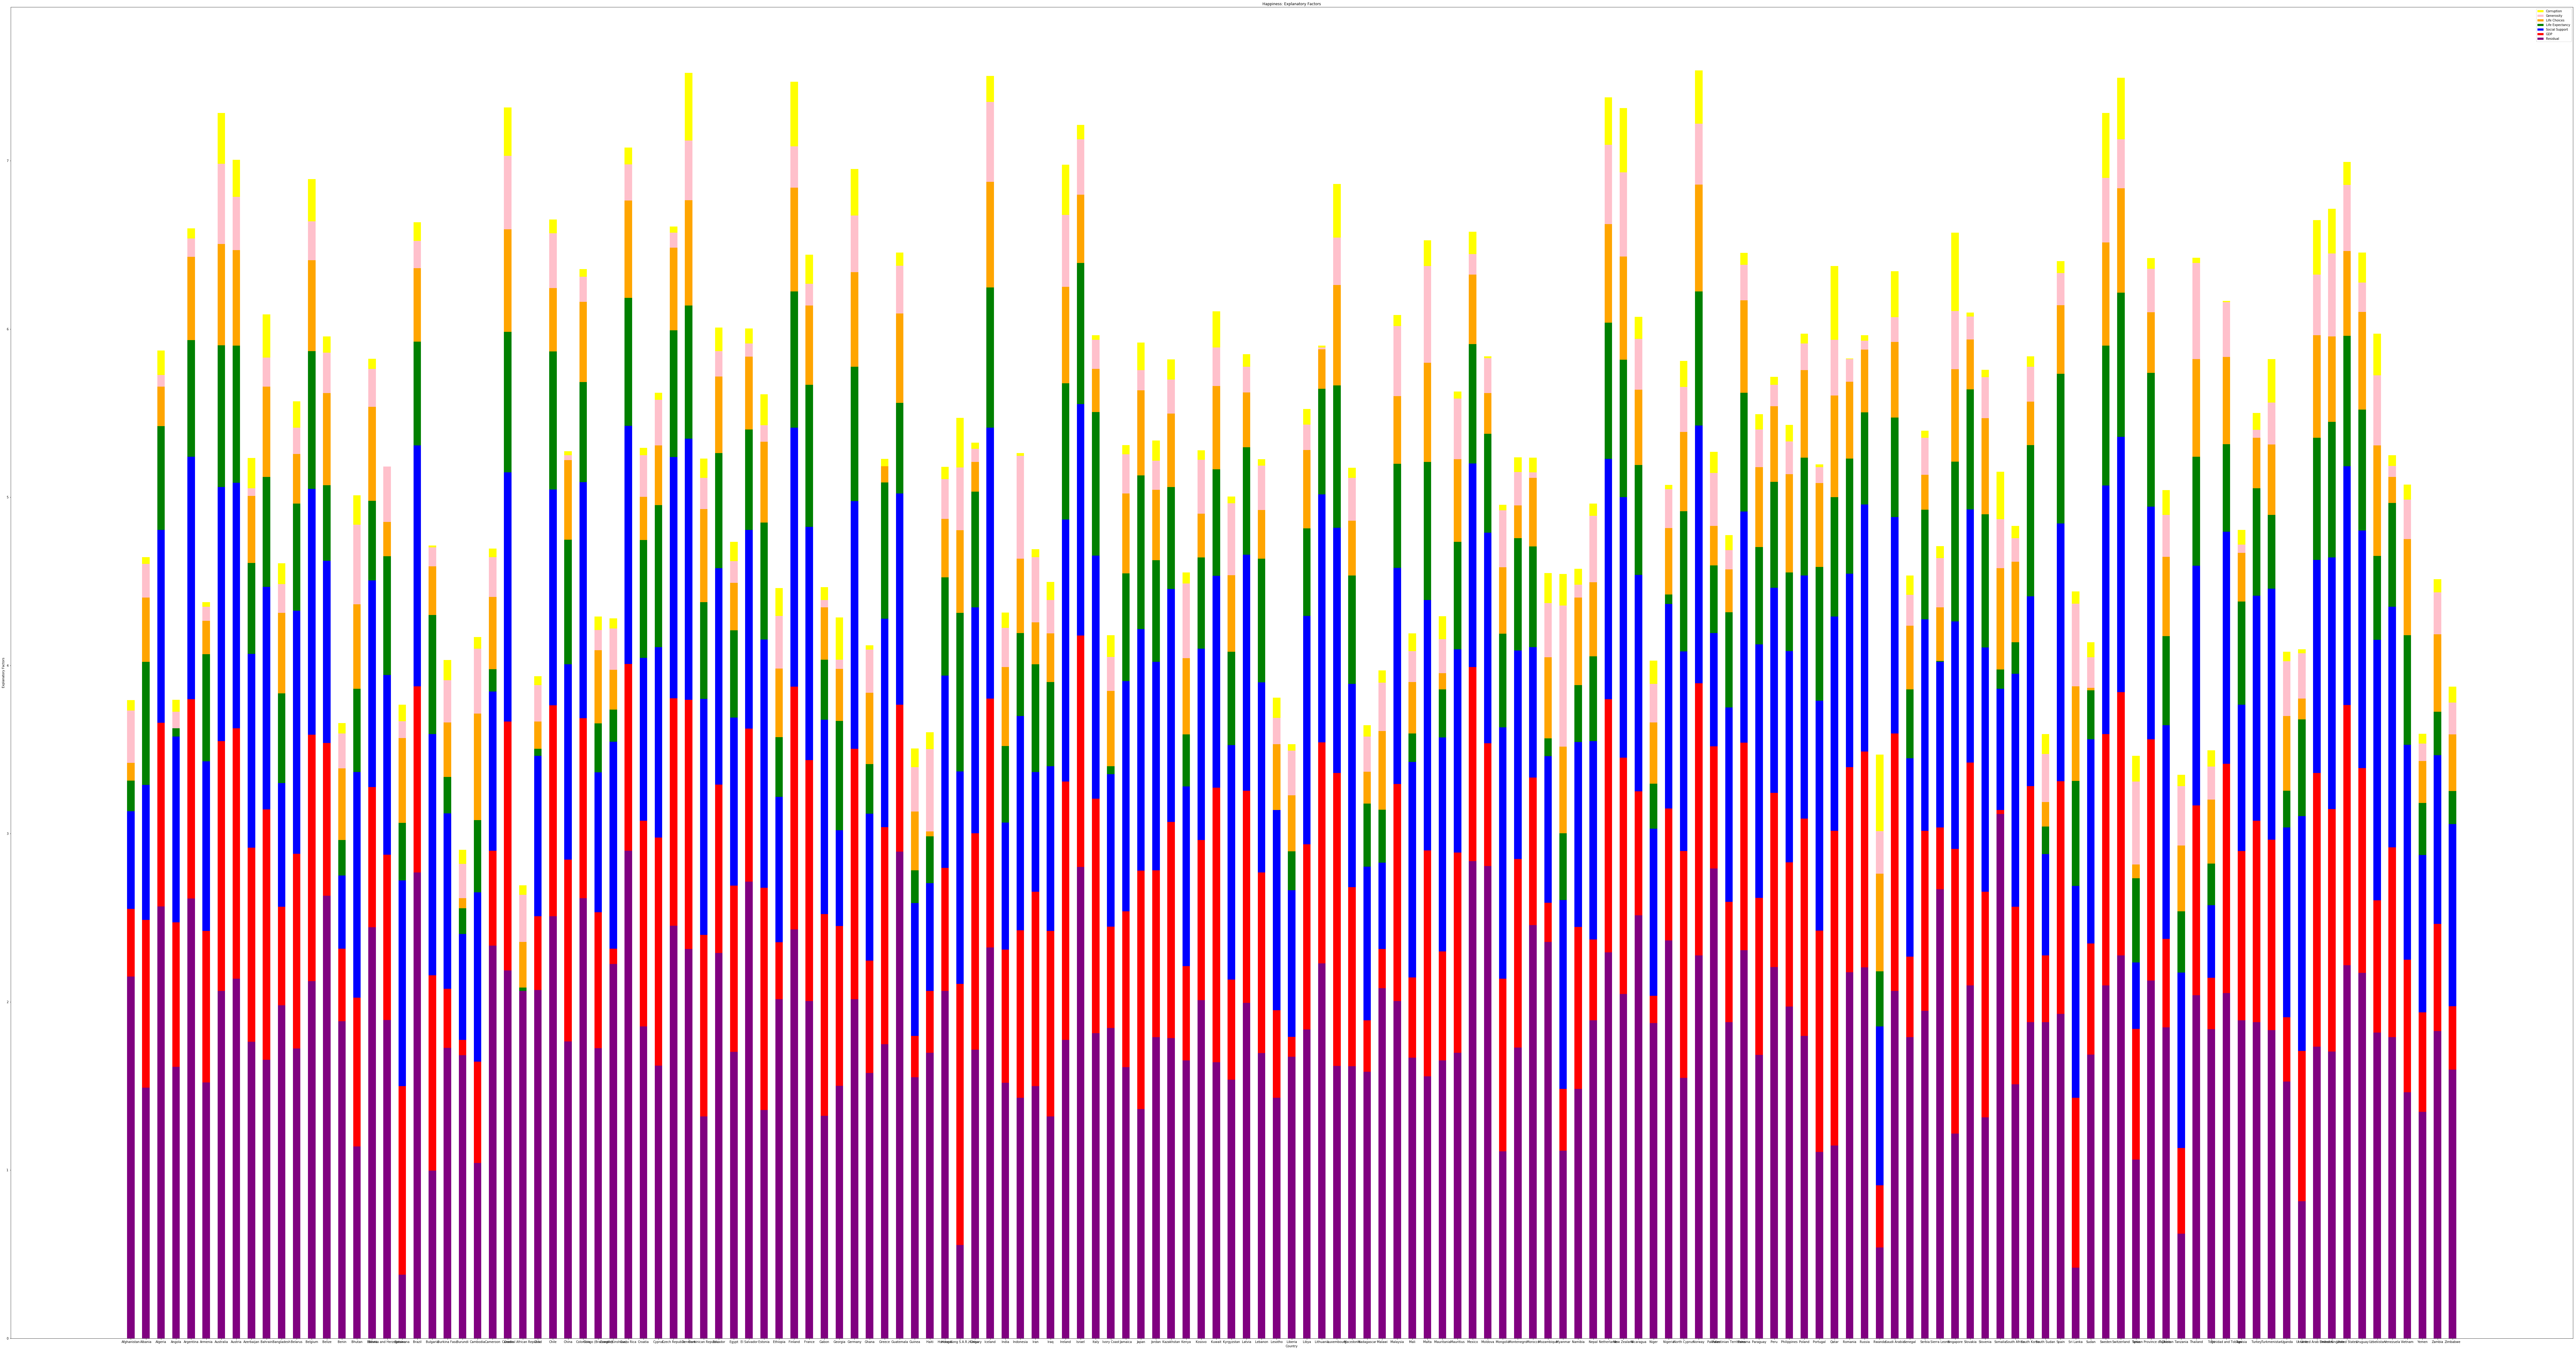

In [93]:
#Stacked bar plot of happiness score components to visualize the dataframe above
country = happiness_sorted.index
GDP = happiness_sorted['Explained by: GDP per capita']
social_support = happiness_sorted['Explained by: Social support']
life_exp = happiness_sorted['Explained by: Healthy life expectancy']
life_choices = happiness_sorted['Explained by: Freedom to make life choices']                  
generosity = happiness_sorted['Explained by: Generosity']    
corruption = happiness_sorted['Explained by: Perceptions of corruption']
residual = happiness_sorted['Dystopia (1.85) + residual']
ind = [x for x, _ in enumerate(country)]
stackedbarplot = plt.figure(figsize=(150,80))


plt.bar(ind, corruption, width=0.5, label='Corruption', color='Yellow', bottom=generosity+life_choices+life_exp+social_support+GDP+residual )
plt.bar(ind, generosity,width=0.5, label='Generosity', color='Pink', bottom=life_choices+life_exp+social_support+GDP+residual)
plt.bar(ind, life_choices, width=0.5, label='Life Choices', color='Orange', bottom=life_exp+social_support+GDP+residual)
plt.bar(ind, life_exp, width=0.5, label='Life Expectancy', color='Green', bottom=social_support+GDP+residual)
plt.bar(ind, social_support, width=0.5, label='Social Support', color='Blue', bottom=GDP+residual)
plt.bar(ind, GDP, width=0.5, label='GDP', color='Red', bottom=residual)
plt.bar(ind, residual,width=0.5, label='Residual', color='Purple')


plt.xticks(ind, country)
plt.ylabel("Explanatory Factors")
plt.xlabel("Country")
plt.legend(loc="upper right")
plt.title("Happiness: Explanatory Factors")
plt.show()

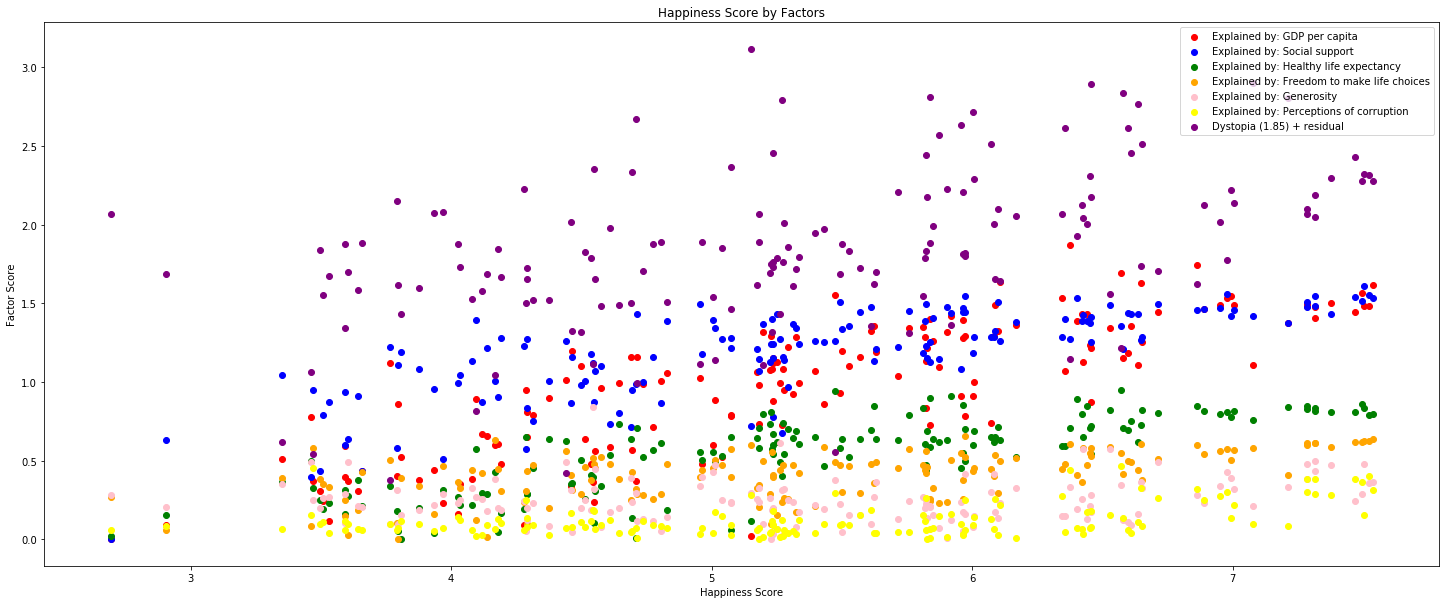

In [94]:
x = happiness_sorted['Happiness score']
GDP = happiness_sorted['Explained by: GDP per capita']
social_support = happiness_sorted['Explained by: Social support']
life_exp = happiness_sorted['Explained by: Healthy life expectancy']
life_choices = happiness_sorted['Explained by: Freedom to make life choices']                  
generosity = happiness_sorted['Explained by: Generosity']    
corruption = happiness_sorted['Explained by: Perceptions of corruption']
residual = happiness_sorted['Dystopia (1.85) + residual']
plt.figure(figsize=(25,10))
plt.scatter(x, GDP, color='red')
plt.scatter(x, social_support, color='blue')
plt.scatter(x, life_exp ,color='green')
plt.scatter(x, life_choices, color='orange')
plt.scatter(x, generosity, color='pink')
plt.scatter(x, corruption, color='yellow')
plt.scatter(x, residual, color='purple')


plt.xlabel('Happiness Score')
plt.ylabel('Factor Score')
plt.title('Happiness Score by Factors')
plt.legend(loc="upper right")
plt.show()

## Exploring Residual by examining the impact of trust

In [95]:
factors2= factors_numeric.fillna(0)
factors2.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,0.517637,0.258195,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,0.583926,0.237092,...,0.0,0.0,0.441906,0.286315,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,0.618265,0.275324,...,0.0,0.0,0.327318,0.275833,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,0.611387,0.267175,...,0.0,0.0,0.336764,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,0.710385,0.267919,...,0.0,0.0,0.344540,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


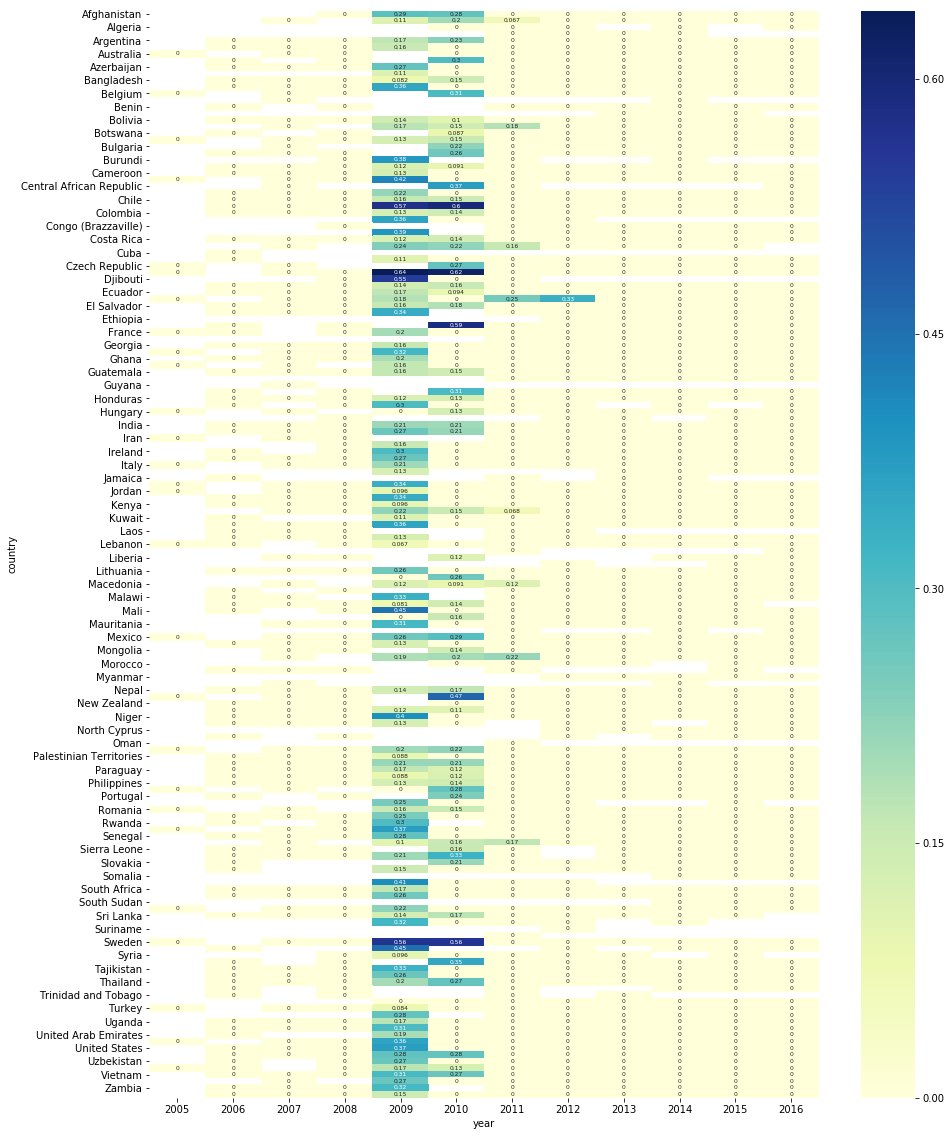

In [96]:
heatmap1_data = pd.pivot_table(factors2, values='Most people can be trusted, Gallup', 
                     index=factors2.index, 
                     columns='year')
plt.figure(figsize=(15,20))
sns.heatmap(heatmap1_data, cmap="YlGnBu",annot=True, annot_kws={"size": 6})


In [97]:
factors3 = factors2.copy().sort_values(['Most people can be trusted, Gallup'], ascending=False)
factors3.head(10)
#Many of the happiest countries (Norway, Denmark, Iceland, Switzerland, Finland) appear in this list of the highest trust scores

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
country,,,,,,,,,,,,,,,,,,,,,
Denmark,2009,7.683359,10.657216,0.938892,68.772865,0.949336,0.253530,0.205770,0.748949,0.233585,...,0.2884,0.279033,0.504106,0.640332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Denmark,2010,7.770515,10.668895,0.974977,69.212502,0.943631,0.232510,0.174896,0.784827,0.154563,...,0.2902,0.279033,0.434083,0.620493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
China,2010,4.652737,9.151599,0.767753,68.006721,0.804794,-0.148628,0.000000,0.765265,0.158100,...,0.4206,0.424400,0.477512,0.596461,0.000000,0.594595,0.504000,0.544606,0.496780,0.614519
Finland,2010,7.393264,10.582151,0.935481,70.010147,0.916009,0.080553,0.412516,0.832109,0.202095,...,0.2774,0.277456,0.403239,0.585067,0.571719,0.000000,0.479230,0.000000,0.580379,0.000000
China,2009,4.454361,9.055391,0.798034,67.821632,0.771143,-0.175098,0.000000,0.785806,0.161650,...,0.0000,0.424400,0.566069,0.574491,0.000000,0.594595,0.504000,0.544606,0.496780,0.614519
Sweden,2009,7.265977,10.616931,0.902533,71.430336,0.864005,0.207678,0.292112,0.819678,0.151363,...,0.2661,0.268922,0.000000,0.564120,0.570790,0.000000,0.565907,0.637185,0.679728,0.607827
Sweden,2010,7.496019,10.666571,0.970243,71.518143,0.904700,0.128150,0.253087,0.833033,0.200112,...,0.2681,0.268922,0.309503,0.561386,0.570790,0.000000,0.565907,0.637185,0.679728,0.607827
Djibouti,2009,4.905925,7.879416,0.900565,51.013538,0.649316,0.006188,0.634223,0.662168,0.232133,...,0.0000,0.425650,0.000000,0.547046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Netherlands,2010,7.501876,10.732967,0.956537,70.739174,0.921448,0.336218,0.398592,0.853234,0.206079,...,0.2873,0.294344,0.464675,0.469323,0.000000,0.000000,0.000000,0.000000,0.435723,0.661757


In [98]:
filtered_2009 = factors2_filtered = factors2[factors2['year'] == 2009] 
filtered_2009.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,0.583926,0.237092,...,0.0000,0.000000,0.441906,0.286315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Albania,2009,5.485470,9.104285,0.833047,67.494919,0.525223,-0.157199,0.863665,0.640024,0.279257,...,0.0000,0.305000,0.617361,0.111004,0.000000,0.000000,0.243243,0.232000,0.000000,0.000000
Argentina,2009,6.424133,9.650431,0.918693,66.404549,0.636646,-0.121117,0.884742,0.863786,0.236901,...,0.4527,0.479421,0.368422,0.169295,0.270073,0.223553,0.170844,0.150154,0.174058,0.193531
Armenia,2009,4.177582,8.758132,0.680007,64.703400,0.441413,-0.197153,0.881887,0.542872,0.411280,...,0.2958,0.325923,0.427577,0.156644,0.000000,0.000000,0.235000,0.000000,0.000000,0.109136
Azerbaijan,2009,4.573725,9.641726,0.735970,61.506973,0.498138,-0.109193,0.753850,0.543640,0.233942,...,0.0000,0.210980,0.331236,0.274056,0.000000,0.000000,0.194306,0.000000,0.000000,0.147933


In [99]:
filtered_2010 = factors2_filtered = factors2[factors2['year'] == 2010] 
filtered_2010.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,0.618265,0.275324,...,0.0000,0.000000,0.327318,0.275833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Albania,2010,5.268937,9.145679,0.733152,67.667595,0.568958,-0.171882,0.726262,0.647908,0.300060,...,0.0000,0.305000,0.543528,0.201118,0.000000,0.000000,0.243243,0.232000,0.000000,0.000000
Algeria,2010,5.463567,9.464850,0.000000,63.553486,0.592696,-0.231348,0.618038,0.000000,0.000000,...,0.0000,0.000000,0.492713,0.000000,0.000000,0.000000,0.000000,0.107644,0.000000,0.179286
Argentina,2010,6.441067,9.729388,0.926799,66.545967,0.730258,-0.116924,0.854695,0.846136,0.210975,...,0.4450,0.479421,0.366742,0.228952,0.270073,0.223553,0.170844,0.150154,0.174058,0.193531
Armenia,2010,4.367811,8.780774,0.660342,64.817368,0.459257,-0.159151,0.890629,0.509669,0.426496,...,0.3107,0.325923,0.385238,0.000000,0.000000,0.000000,0.235000,0.000000,0.000000,0.109136
